# Contenidos

En este cuaderno encontrarás información complementaria a la que tienes en las diapositivas usadas en clase relacionada con NetworkX, cuya consulta te permitirá realizar la práctica 1.

1.   Operaciones con grafos
2.   Formas de cargar datos en grafos



In [ ]:
#@title
# Elimina esta activación del Google Colab si no lo usas
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crea el grafo
G1 = nx.Graph()
# Añade pares nodo/enlace
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])


# Operaciones básicas con grafos

## Una definición _formal_ de redes

Antes de explorar ejemplos de redes,
primero queremos darle una definición más formal
de lo que son las redes.
La razón es que conocer una definición _formal_
nos ayuda a refinar nuestra aplicación de redes.
Así que tengan paciencia conmigo por un momento.

En la literatura un poco más académica,
las redes se conocen más formalmente como **grafos**.

Los grafos se componen de dos _conjuntos_ de objetos:

- Un **conjunto de nodos**: las "entidades" en un grafo.
- Un **conjunto de enlaces**: el registro de "relaciones" entre las entidades en el grafo.

Por ejemplo, si un **conjunto de nodos** $n$ se compone de elementos:

$$n = \{a, b, c, d, ...\}$$

Entonces, el **conjunto de aristas** $e$ se representaría como tuplas de _pares_ de elementos:

$$e = \{(a, b), (a, c), (c, d), ...\}$$

Si extrajo todos los nodos del conjunto perimetral $e$,
debe formar _al menos un subconjunto_ del conjunto de nodos $n$.
(Es al menos un subconjunto porque no todos los nodos en $n$ pueden participar en un borde).

Si dibuja una red, los "nodos" se representan comúnmente como formas, como círculos,
mientras que los "enlaces" son las líneas entre las formas.

## Modelo de datos

En NetworkX, los datos de grafos se almacenan de forma similar a un diccionario. Se crean a partir de un objeto `Graph`, instanciado canónicamente con la variable `G` de la siguiente manera:

In [ ]:
G = nx.Graph()
# Copiamos en 'G' los datos de 'G1'
G = G1

Los nodos son parte del atributo `G.nodes`. Al ser un contenedor similar a un diccionario, la clave es el propio nodo y los valores son un diccionario de atributos. Se puede acceder a los datos del nodo de esta forma:



In [ ]:
G.nodes[0]

{}

En este caso, observamos que el nodo en cuestión no tiene atributos.

Los enlaces son parte del atributo `G.edges`, que también se almacena en un contenedor similar a un diccionario. Se puede acceder a los enlace así:

In [ ]:
G.edges[0, 1]

{}

Debido a la implementación similar a un diccionario del gráfico,
cualquier objeto hashable puede ser un nodo.
Esto significa cadenas y tuplas, pero no listas y conjuntos.

El objeto `nx`dispone (entre otros) del método `draw_network` mediante el cual podemos obtener una representación simple del grafo:

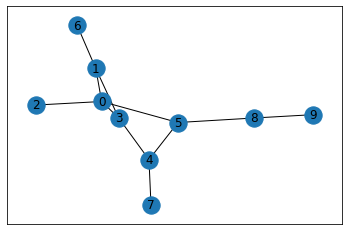

In [ ]:
# Representa el grafo
nx.draw_networkx(G1)
plt.show()

## Operaciones básicas en un grafo

Cuando obtienes datos grafos, una de las primeras cosas que se puede hacer es
revisar qué contiene, es decir, el número de nodos y el número de enlaces que representa en el grafo. 

Lo primero que necesita saber es el `tipo` del gráfico:


In [ ]:
type(G)

Usar DiGraph en la creación del grafo, nos permite definir un grafo dirigido.Si no fuera dirigido, el tipo cambiaría:

In [ ]:
H = nx.DiGraph()
type(H)

Si quisiéramos consultar cierto conjunto de nodos, se podría hacer así:

In [ ]:
list(G.nodes())[0:5]

`G.nodes()` devuelve una "vista" de los nodos. En realidad, no podemos dividir la vista y obtener una subselección, pero podemos _al menos_ ver qué nodos están presentes. Para abreviar, hemos cortado `G.nodes()` pasado a un constructor `list()`, que facilitaría la manipulación de los datos de salida. 

Además, podemos consultar la longitud del grafo dado debido a que `NodeView` es iterable:

In [ ]:
len(G.nodes())

Si nuestros nodos tienen metadatos adjuntos, podríamos consultarlos pasando `data=True`:

In [ ]:
list(G.nodes(data=True))[0:5]

G.nodes(data=True) devuelve un `NodeDataView`. 

### Consulta de relaciones entre nodos






Se puede consultar los enlaces en el grafo así:

In [ ]:
list(G.edges())[0:5]

[(0, 1), (0, 2), (0, 3), (0, 5), (1, 3)]


Similar a `NodeView`, `G.edges()` devuelve un `EdgeView` que también es iterable. 

Dado que G.edges() es iterable, podemos obtener su longitud para ver el número de enlaces que están presentes en un grafo.

In [ ]:
len(G.edges())

11

Del mismo modo, también podríamos consultar todos los metadatos del enlace:

In [ ]:
list(G.edges(data=True))[0:5]

[(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 5, {}), (1, 3, {})]

Al igual que `NodeDataView`, `EdgeDataView` es similar a un diccionario,
con la diferencia de que las claves son 2 tuplas en lugar de ser objetos únicos _hashable_. Por lo tanto, podemos escribir una sintaxis como la siguiente para recorrer la lista de enlaces:

```
para n1, n2, d en G.edges(data=True):
    # n1, n2 son los nodos
    # d es el diccionario de metadatos
    ...
```


## Modificar un grafo

Podemos modificar la forma de un grafo de 2 formas:

<br>**Agregar nodos**

La API gráfica de NetworkX permite agregar un nodo así:

```pitón
G.add_node(nodo, atributo_1=algún_valor, atributo_2=algún_valor)
```

<br>**Agregar enlaces**

De forma similar se pueden añadir enlaces:

```pitón
G.add_edge(nodo_1, nodo_2, atributo_1=algún_valor, atributo_2=algún_valor)
```


# Formas de cargar datos en Grafos en NetworkX

A continuación, se presentan 3 formas de cargar datos a un grafo que estuvieran en un fichero de texto (CSV):


*   mediante una **lista adyacencias** (es decir, un fichero donde se indica con qué nodos cierto nodo está conectado)
*   a partir de una **lista de enlaces** (formada por partes de nodos relacionados junto a sus posibles atributos)
*   como _dataframe_ tipo Pandas



### Lista de adyacencia

`G_lista_adyacencia.txt` es la representación de la lista de adyacencias de G1 (grafo definido el principio del cuaderno).

Se puede leer de la siguiente manera:
* `0 1 2 3 5` $\rightarrow$ nodo `0` es adyacente a los nodos `1, 2, 3, 5`
* `1 3 6` $\rightarrow$ nodo `1` es (también) adyacente a los nodos `3, 6`
* `2` $\rightarrow$ nodo `2` es (también) adyacente a ningún nodo nuevo
* `3 4` $\rightarrow$ nodo `3` es (también) adyacente al nodo `4` 

y así con el resto del fichero. 

Ten en cuenta que las adyacencias solo se contabilizan una vez (por ejemplo, el nodo `2` es adyacente al nodo `0`, pero el nodo `0` no aparece en la fila del nodo `2`, porque ese borde ya se ha contabilizado en el nodo ` fila de 0`s).

In [ ]:
# cambiar la siguiente ruta al caso propio
ruta = "/content/drive/MyDrive/Módulos :: 2022-23/Modelos de inteligencia artificial (IA-BD)/4. Análisis de estructuras en red/Lecciones/"

Si leemos en la lista de adyacencia usando `nx.read_adjlist`, podemos ver que coincide con `G1`.

In [ ]:
G2 = nx.read_adjlist(ruta + "G_lista_adyacencia.txt", nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

### Matriz de adyacencia

Los elementos de una matriz de adyacencia indican si los pares de vértices son adyacentes o no en el gráfico. Cada nodo tiene una fila y una columna correspondientes. Por ejemplo, la fila `0`, la columna `1` corresponde al borde entre el nodo `0` y el nodo `1`.

Al leer la fila `0`, hay un `1` en las columnas `1`, `2`, `3` y `5`, lo que indica que el nodo `0` es adyacente a los nodos 1, 2, 3 , y 5

In [ ]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

Si convertimos la matriz de adyacencia en un gráfico de redx usando `nx.Graph`, podemos ver que coincide con G1.

In [ ]:
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

### Lista de enlaces (Edgelist)

El formato de la lista de enlaces representa los pares de enlaces en las dos primeras columnas. Se pueden agregar atributos de enlace adicionales en columnas posteriores. si miras `G_lista_enlaces.txt`, verás que coincide con el grafo original `G1`, pero ahora cada enlace tiene un peso.

Por ejemplo, desde la primera fila, podemos ver que el enlace entre los nodos `0` y `1` tiene un peso de `4`.

0 1 4<br>
0 2 3<br>
0 3 2<br>
0 5 6<br>
1 3 2<br>
1 6 5<br>
3 4 3<br>
4 5 1<br>
4 7 2<br>
5 8 6<br>
8 9 1

Usar `read_edgelist` y pasar una lista de tuplas con el nombre y tipo de cada atributo de borde crea un grafo con los atributos de enlace.

In [ ]:
G4 = nx.read_edgelist(ruta + 'G_lista_enlaces.txt', data=[('Weight', int)])

G4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

### Pandas DataFrame

Los grafos también se pueden crear a partir de "dataframes" tipo Pandas si están en formato de lista de enlaces.

In [ ]:
G_df = pd.read_csv(ruta + 'G_lista_enlaces.txt', delim_whitespace=True, header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


 ... y a partir de un "dataframe" puede generarse un grafo.

In [ ]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])